In [1]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer(as_frame=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['data'], data['target'], test_size=0.2, random_state=100)

# Preprocess the data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

lr = LogisticRegression().fit(X_train, y_train)
lr_score = lr.score(X_test, y_test)
print(f'Logistic Regression accuracy: {lr_score:.4f}')

gnb = GaussianNB().fit(X_train, y_train)
gnb_score = gnb.score(X_test, y_test)
print(f'Naive Bayes accuracy: {gnb_score:.4f}')

svc = SVC(probability=True).fit(X_train, y_train)
svc_score = svc.score(X_test, y_test)
print(f'Support Vector Machine accuracy: {svc_score:.4f}')

Logistic Regression accuracy: 0.9737
Naive Bayes accuracy: 0.9386
Support Vector Machine accuracy: 0.9649


In [2]:
# Define the base models
log_clf = LogisticRegression()
nb_clf = GaussianNB()
svc_clf = SVC(probability=True)  # Set probability=True for soft voting

# Create the VotingClassifier with hard voting
voting_clf_hard = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('svc', svc_clf)
    ],
    voting='hard'
)

voting_clf_hard.fit(X_train, y_train)
voting_clf_hard_score = voting_clf_hard.score(X_test, y_test)
print(f'Voting Classifier (hard) accuracy: {voting_clf_hard_score:.4f}')

# Create the VotingClassifier with soft voting
voting_clf_soft = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('svc', svc_clf)
    ],
    voting='soft'
)

voting_clf_soft.fit(X_train, y_train)
voting_clf_soft_score = voting_clf_soft.score(X_test, y_test)
print(f'Voting Classifier (soft) accuracy: {voting_clf_soft_score:.4f}')

# Create the VotingClassifier with weighted soft voting
voting_clf_weighted = VotingClassifier(
    estimators=[
        ('lr', log_clf),
        ('nb', nb_clf),
        ('svc', svc_clf)
    ],
    voting='soft',
    weights=[2, 1, 3]  # Example weights for the classifiers
)

voting_clf_weighted.fit(X_train, y_train)
voting_clf_weighted_score = voting_clf_weighted.score(X_test, y_test)
print(f'Voting Classifier (weighted soft) accuracy: {voting_clf_weighted_score:.4f}')

Voting Classifier (hard) accuracy: 0.9649
Voting Classifier (soft) accuracy: 0.9561
Voting Classifier (weighted soft) accuracy: 0.9737


Accuracy: 0.97


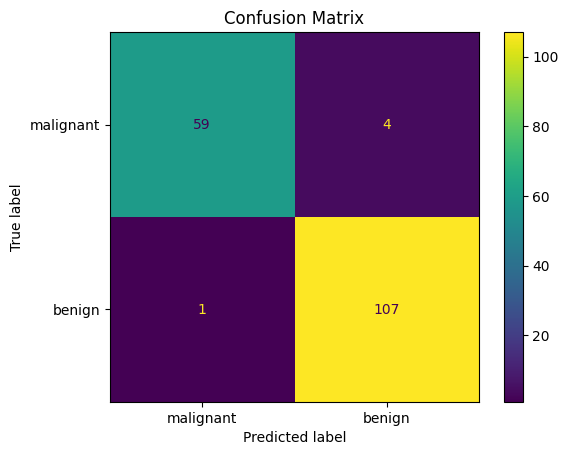

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 載入Breast Cancer資料集
data = load_breast_cancer()
X, y = data.data, data.target

# 分割資料成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 使用Bagging來訓練隨機森林模型
bagging_clf = BaggingClassifier(
    estimator=RandomForestClassifier(n_estimators=100),
    n_estimators=10,
    random_state=42
)
bagging_clf.fit(X_train, y_train)

# 預測測試集
y_pred = bagging_clf.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 混淆矩陣
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot()

# 顯示圖表
plt.title('Confusion Matrix')
plt.show()

In [4]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 載入Breast Cancer資料集
data = load_breast_cancer()
X, y = data.data, data.target

# 分割資料成訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定義分類器
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Gaussian NB": GaussianNB(),
    "SVM": SVC(probability=True)
}

# 訓練並評估每個分類器
for name, clf in classifiers.items():
    bagging_clf = BaggingClassifier(
        estimator=clf,
        n_estimators=100,
        random_state=42
    )
    bagging_clf.fit(X_train, y_train)

    # 預測測試集
    y_pred = bagging_clf.predict(X_test)

    # 計算準確率
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy with Bagging: {accuracy:.2f}')

    # 訓練原始分類器（不使用Bagging）並進行評估
    clf.fit(X_train, y_train)
    y_pred_original = clf.predict(X_test)
    accuracy_original = accuracy_score(y_test, y_pred_original)
    print(f'{name} Accuracy without Bagging: {accuracy_original:.2f}')
    print('-' * 50)

Logistic Regression Accuracy with Bagging: 0.96
Logistic Regression Accuracy without Bagging: 0.96
--------------------------------------------------
Gaussian NB Accuracy with Bagging: 0.97
Gaussian NB Accuracy without Bagging: 0.97
--------------------------------------------------
SVM Accuracy with Bagging: 0.95
SVM Accuracy without Bagging: 0.95
--------------------------------------------------


In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 加載資料集
data = load_breast_cancer()
X = data.data
y = data.target

# 切分訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 初始化基分類器
base_clf = DecisionTreeClassifier(max_depth=1)

# 初始化 AdaBoost 分類器
ada_clf = AdaBoostClassifier(
    estimator=base_clf,
    n_estimators=50,
    random_state=42
)

# 設置網格搜索的參數範圍
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5, 1.0, 1.5, 2.0]
}

# 使用網格搜索和交叉驗證來尋找最佳參數
grid_search = GridSearchCV(ada_clf, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 打印最佳參數
print("Best parameters found: ", grid_search.best_params_)

# 使用最佳參數訓練模型
best_ada_clf = grid_search.best_estimator_
best_ada_clf.fit(X_train, y_train)

# 預測測試集
y_pred = best_ada_clf.predict(X_test)

# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\617816\AppData\Local\anaconda3\envs\ml\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

Best parameters found:  {'learning_rate': 1.0}
Accuracy: 0.9737


In [4]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Prepare the 3-fold split
kf = KFold(n_splits=3, shuffle=True, random_state=42)
train_folds = list(kf.split(X_train))

meta_x = []
meta_y = []

# Function to perform stacking and generate meta-features
def stacking_model(model, X_train, y_train, X_test, train_folds):
    meta_x = []
    meta_y = []

    for i, (train_index, valid_index) in enumerate(train_folds):
        X_tr, X_val = X_train[train_index], X_train[valid_index]
        y_tr, y_val = y_train[train_index], y_train[valid_index]

        model.fit(X_tr, y_tr)
        tmp_meta_x = model.predict(X_val)
        tmp_meta_y = model.predict(X_test)

        meta_x.extend(tmp_meta_x)
        meta_y.append(tmp_meta_y)

    mean_meta_y = np.mean(meta_y, axis=0)
    return np.array(meta_x), mean_meta_y

# First model: Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
meta_x_lr, mean_meta_y_lr = stacking_model(lr, X_train, y_train, X_test, train_folds)

meta_train_1 = pd.DataFrame({'meta_x': meta_x_lr, 'y': y_train})
meta_test_1 = pd.DataFrame({'meta_y': mean_meta_y_lr, 'y': y_test})

# Second model: Support Vector Regression (SVR)
from sklearn.svm import SVR
svr = SVR()
meta_x_svr, mean_meta_y_svr = stacking_model(svr, X_train, y_train, X_test, train_folds)

meta_train_2 = pd.DataFrame({'meta_x': meta_x_svr, 'y': y_train})
meta_test_2 = pd.DataFrame({'meta_y': mean_meta_y_svr, 'y': y_test})

# Third model: Decision Tree Regressor
dtr = DecisionTreeRegressor()
meta_x_dtr, mean_meta_y_dtr = stacking_model(dtr, X_train, y_train, X_test, train_folds)

meta_train_3 = pd.DataFrame({'meta_x': meta_x_dtr, 'y': y_train})
meta_test_3 = pd.DataFrame({'meta_y': mean_meta_y_dtr, 'y': y_test})

# Combine the meta-train datasets
big_meta_train = pd.concat([meta_train_1, meta_train_2, meta_train_3])

# Meta-model with AdaBoost
ada = AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)
ada.fit(big_meta_train['meta_x'].values.reshape(-1, 1), big_meta_train['y'])

# Predict with the meta-test datasets
final_1 = ada.predict(meta_test_1['meta_y'].values.reshape(-1, 1))
final_2 = ada.predict(meta_test_2['meta_y'].values.reshape(-1, 1))
final_3 = ada.predict(meta_test_3['meta_y'].values.reshape(-1, 1))

# Average the predictions and calculate the Mean Squared Error (MSE)
final_y = (final_1 + final_2 + final_3) / 3
mse = np.mean((final_y - y_test) ** 2)

print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.23255968111869074


In [2]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# 假設數據
X = np.array([[1], [2], [3], [4], [5], [6], [7], [8], [9]])
y = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9])

# 初始化 3 折交叉驗證
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# 中間特徵的佔位符
meta_train = np.zeros((len(y), 3))
meta_test = np.zeros((X.shape[0], 3))

# 模型
models = [LinearRegression(), SVR(), DecisionTreeRegressor()]

# 堆疊過程
for fold_idx, (train_idx, valid_idx) in enumerate(kf.split(X)):
    print(f"--- Fold {fold_idx + 1} ---")
    print(f"Training indices: {train_idx}")
    print(f"Validation indices: {valid_idx}")

    stacking_train = X[train_idx]
    stacking_valid = X[valid_idx]

    print(f"Training data:\n{stacking_train}")
    print(f"Validation data:\n{stacking_valid}\n")

    for model_idx, model in enumerate(models):
        print(f"Training model {model_idx + 1}: {model.__class__.__name__}")
        model.fit(stacking_train, y[train_idx])

        # 在驗證集上進行預測
        meta_train[valid_idx, model_idx] = model.predict(stacking_valid)
        print(f"Validation predictions: {meta_train[valid_idx, model_idx]}")

        # 在測試集上進行預測
        meta_test[:, model_idx] += model.predict(X) / 3
        print(f"Test predictions (cumulative): {meta_test[:, model_idx]}\n")

print("Final Meta Train:\n", meta_train)
print("Final Meta Test:\n", meta_test)


--- Fold 1 ---
Training indices: [0 2 3 4 6 8]
Validation indices: [1 5 7]
Training data:
[[1]
 [3]
 [4]
 [5]
 [7]
 [9]]
Validation data:
[[2]
 [6]
 [8]]

Training model 1: LinearRegression
Validation predictions: [2. 6. 8.]
Test predictions (cumulative): [0.33333333 0.66666667 1.         1.33333333 1.66666667 2.
 2.33333333 2.66666667 3.        ]

Training model 2: SVR
Validation predictions: [3.21842044 5.75693789 6.61953814]
Test predictions (cumulative): [1.12284379 1.07280681 1.15457363 1.36034023 1.63965976 1.9189793
 2.1247459  2.20651271 2.15647573]

Training model 3: DecisionTreeRegressor
Validation predictions: [1. 5. 7.]
Test predictions (cumulative): [0.33333333 0.33333333 1.         1.33333333 1.66666667 1.66666667
 2.33333333 2.33333333 3.        ]

--- Fold 2 ---
Training indices: [1 3 4 5 6 7]
Validation indices: [0 2 8]
Training data:
[[2]
 [4]
 [5]
 [6]
 [7]
 [8]]
Validation data:
[[1]
 [3]
 [9]]

Training model 1: LinearRegression
Validation predictions: [1. 3. 9.]
T